<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/mask2former.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.8 MB/s eta 0:00:00


In [1]:
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation
from PIL import Image
import requests
import torch

# Load Mask2Former trained on COCO instance segmentation dataset
image_processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-small-coco-instance")
model = Mask2FormerForUniversalSegmentation.from_pretrained(
    "facebook/mask2former-swin-small-coco-instance"
)

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    outputs, centroid_prediction_logits = model(**inputs)

# Model predicts class_queries_logits of shape `(batch_size, num_queries)`
# and masks_queries_logits of shape `(batch_size, num_queries, height, width)`
class_queries_logits = outputs.class_queries_logits
masks_queries_logits = outputs.masks_queries_logits

# Perform post-processing to get instance segmentation map
pred_instance_map = image_processor.post_process_semantic_segmentation(
    outputs, target_sizes=[image.size[::-1]]
)[0]
print(pred_instance_map.shape)

Some weights of Mask2FormerForUniversalSegmentation were not initialized from the model checkpoint at facebook/mask2former-swin-small-coco-instance and are newly initialized: ['centroid_regression.weight', 'centroid_regression.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


torch.Size([480, 640])


In [4]:
centroid_prediction_logits.mean(1).shape

torch.Size([1, 8])

In [12]:
class_queries_logits.shape

torch.Size([1, 100, 81])

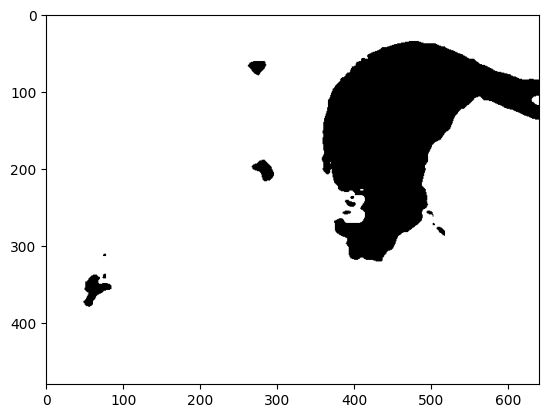

In [2]:
import matplotlib.pyplot as plt
plt.imshow(pred_instance_map, cmap='gray')

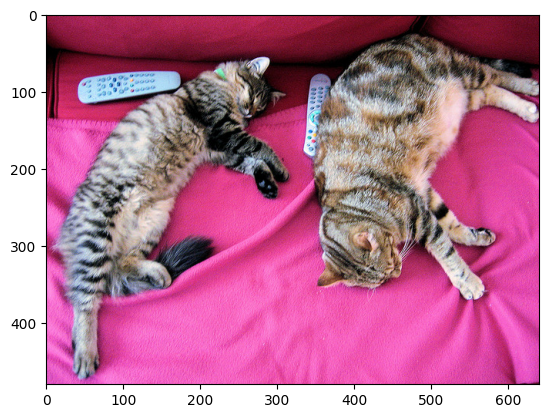

In [4]:
plt.imshow(image)

In [5]:
from torch import nn
l1 = nn.Linear(1024, 8)

In [8]:
feat = torch.ones([1, 1024])
feat.shape

torch.Size([1, 1024])

In [9]:
l1(feat)

tensor([[-0.8664,  1.0411, -0.3643, -0.2083]], grad_fn=<AddmmBackward0>)

In [ ]:
/usr/local/lib/python3.10/dist-packages/transformers/models/mask2former/modeling_mask2former.py